<a href="https://colab.research.google.com/github/FrenchFreis/final/blob/main/ML_PROJ_TEST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIGINAL PROCESS -- NO FEATURE ENGINEERING ETC. POLY

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


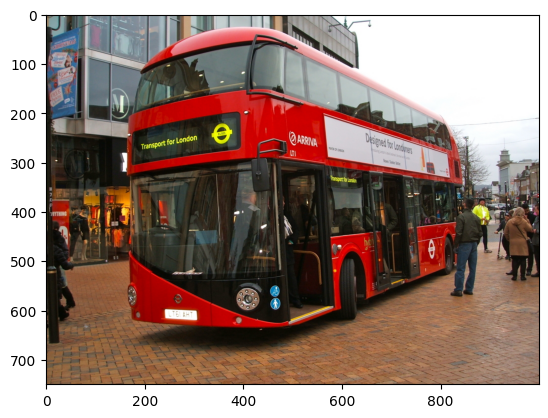

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

def dispImg(img_path):
    image = Image.open(img_path)

    plt.imshow(image)
    plt.axis('on')
    plt.show()

dispImg('/content/drive/My Drive/dataset/train/Bus/Image_5.jpg')

In [8]:
def loadfromFolder(folder):
    images = []
    vTypes = []
    for label, vehicle in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            vTypes.append(type)
    return np.array(images), np.array(vTypes)

images, vTypes = loadfromFolder('/content/drive/My Drive/dataset/train')

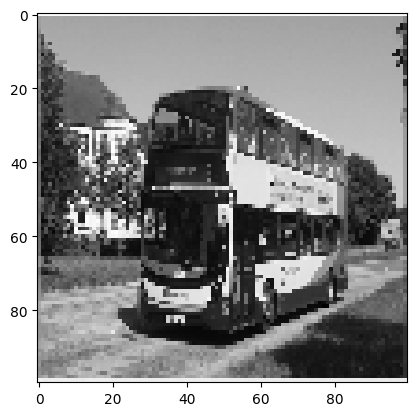

In [9]:
# Get a sample image and its corresponding name
image = images[0] # Access the first image
vType = vTypes[0]  # Get the name corresponding to the image

# choose a compatible shape
reshapeImg = image.reshape(100, 100) # reshape should happen if: data has 30 000 elements, multiply it; 100 x 300 = 30 000

# resize the image 100x100 for display
resizedImg = cv2.resize(reshapeImg, (100, 100))

# Display the image
plt.imshow(resizedImg, cmap="gray")
plt.axis('on')  # Hide axes
plt.show()

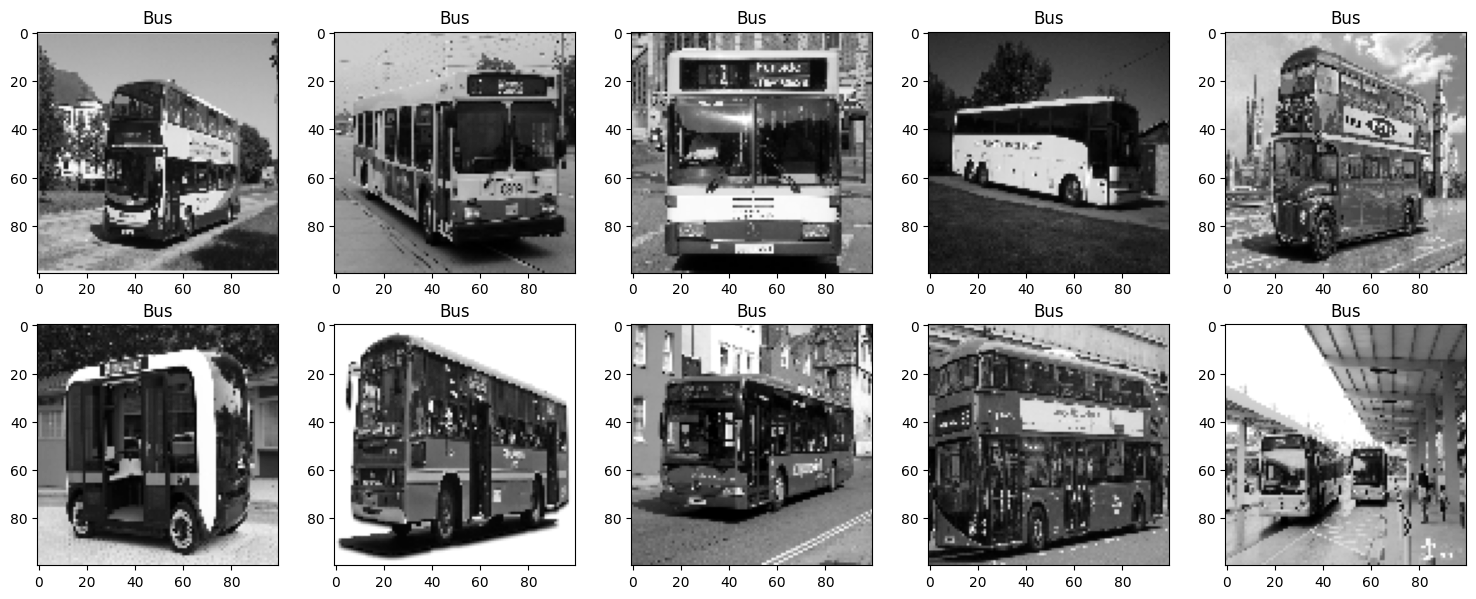

In [10]:
vehicles = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(vehicles):
    image = images[i].reshape(100,100)  # Access the i-th image
    vType = vTypes[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(vType)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=42)

In [12]:
from sklearn import svm

model = svm.SVC(kernel='poly', gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC(kernel='poly')

In [13]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 43.75%


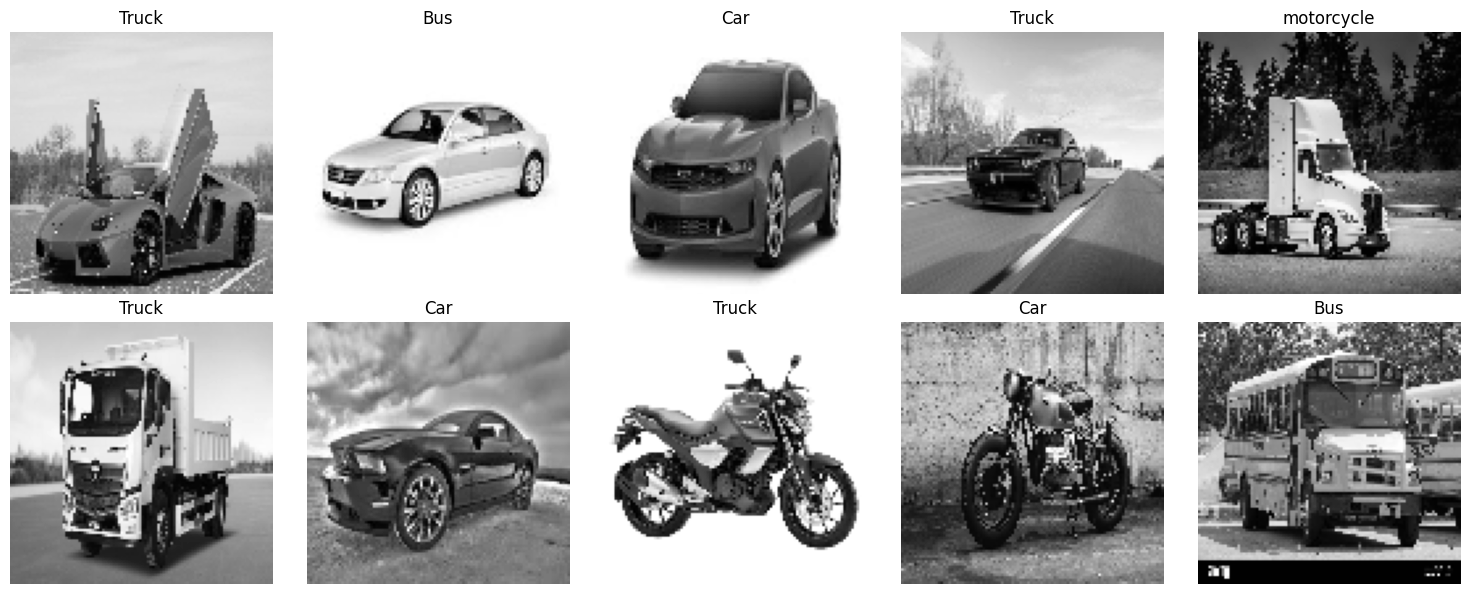

In [14]:
import random

def loadTestImages(folder):
    test_images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
        test_images.append(img.flatten())  # Flatten the image
    return np.array(test_images)

# Load test images
test_folder = '/content/drive/My Drive/dataset/test'  # Adjust this path to your test dataset folder
test_images = loadTestImages(test_folder)

# Predict on the test images
predictions = model.predict(test_images)

# Randomly select 10 predictions and their corresponding images
random_indices = random.sample(range(len(test_images)), 10)

# Display the images and their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

for i, idx in enumerate(random_indices):
    image = test_images[idx].reshape(100, 100)  # Reshape the image for display
    predicted_type = predictions[idx]  # Get the predicted type

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(predicted_type)  # Set the title to the predicted type
    axes[i].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


## CHECKER OF BEST SVM KERNEL

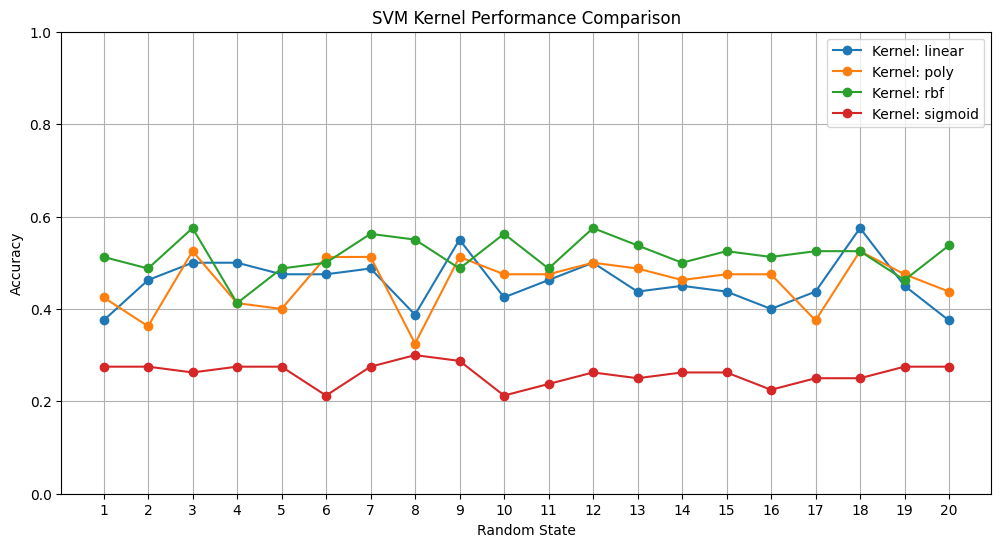

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming images and vTypes are already defined
# Store the accuracy results for different random states and kernels
random_states = range(1, 21)  # Adjust range as needed
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernels
accuracy_results = {kernel: [] for kernel in kernels}  # Initialize dictionary to store accuracy results

for kernel in kernels:
    for random_state in random_states:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=random_state)

        # Initialize the SVM model with the chosen kernel
        model = svm.SVC(kernel=kernel, C=1.0, class_weight='balanced')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Get the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[kernel].append(accuracy)

# Plot the accuracy results
plt.figure(figsize=(12, 6))
for kernel, accuracies in accuracy_results.items():
    plt.plot(random_states, accuracies, marker='o', label=f'Kernel: {kernel}')

plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.xticks(random_states)  # Set x-ticks to random states
plt.ylim(0, 1)  # Set y-axis limits
plt.grid()
plt.legend()
plt.show()

# WITHOUT FE. RBF KERNEL (HIGHEST ACCURACY BASED ON GRAPH)

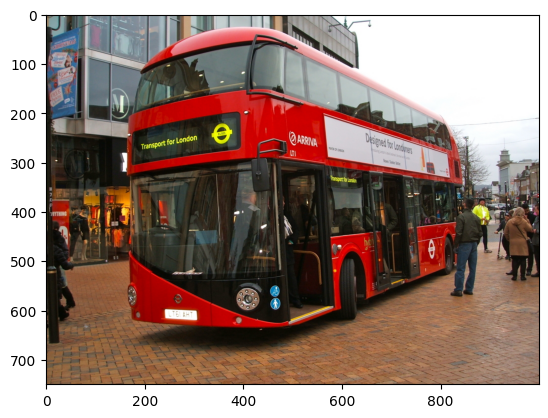

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

def dispImg(img_path):
    image = Image.open(img_path)

    plt.imshow(image)
    plt.axis('on')
    plt.show()

dispImg('/content/drive/My Drive/dataset/train/Bus/Image_5.jpg')

In [17]:
def loadfromFolder(folder):
    images = []
    vTypes = []
    for label, vehicle in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            vTypes.append(type)
    return np.array(images), np.array(vTypes)

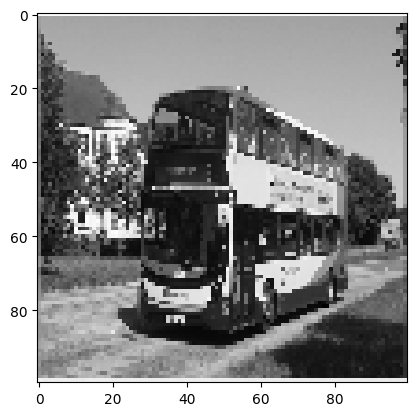

In [18]:
images, vTypes = loadfromFolder('/content/drive/My Drive/dataset/train')
# Get a sample image and its corresponding name
image = images[0] # Access the first image
vType = vTypes[0]  # Get the name corresponding to the image

# choose a compatible shape
reshapeImg = image.reshape(100, 100) # reshape should happen if: data has 30 000 elements, multiply it; 100 x 300 = 30 000

# resize the image 100x100 for display
resizedImg = cv2.resize(reshapeImg, (100, 100))

# Display the image
plt.imshow(resizedImg, cmap="gray")
plt.axis('on')  # Hide axes
plt.show()

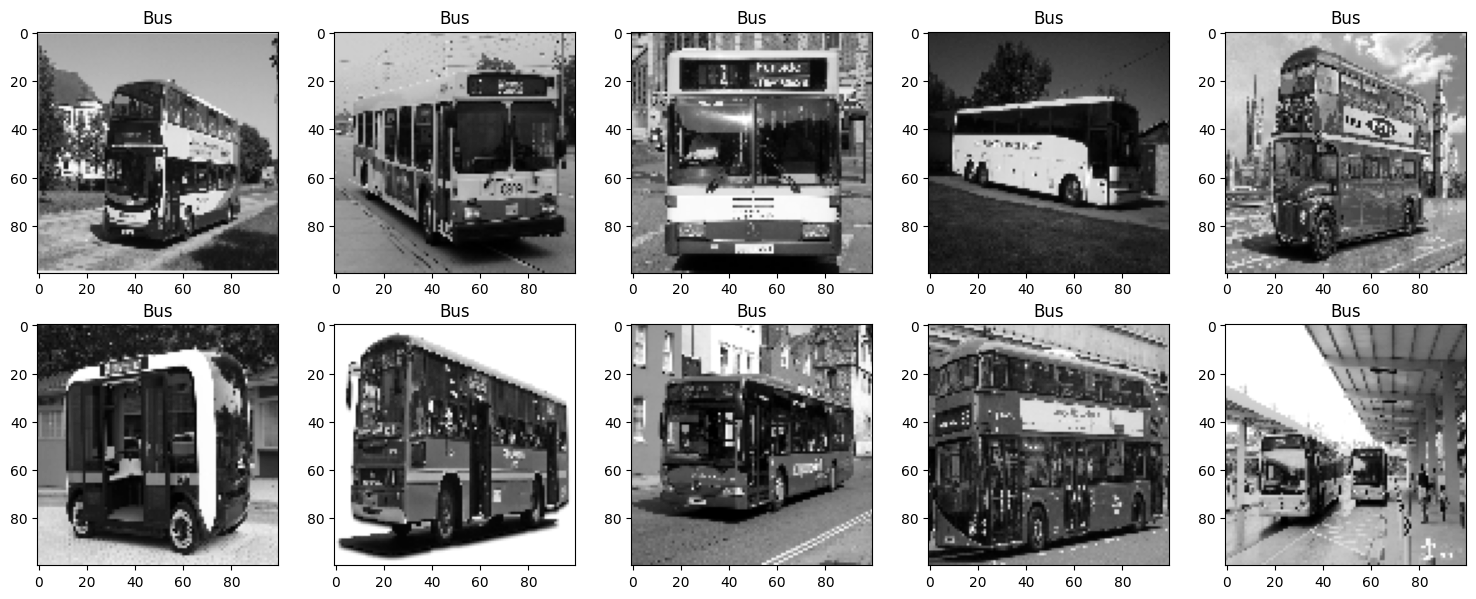

In [19]:
vehicles = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(vehicles):
    image = images[i].reshape(100,100)  # Access the i-th image
    vType = vTypes[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(vType)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=42)
from sklearn import svm

model = svm.SVC(kernel='rbf', gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 47.50%


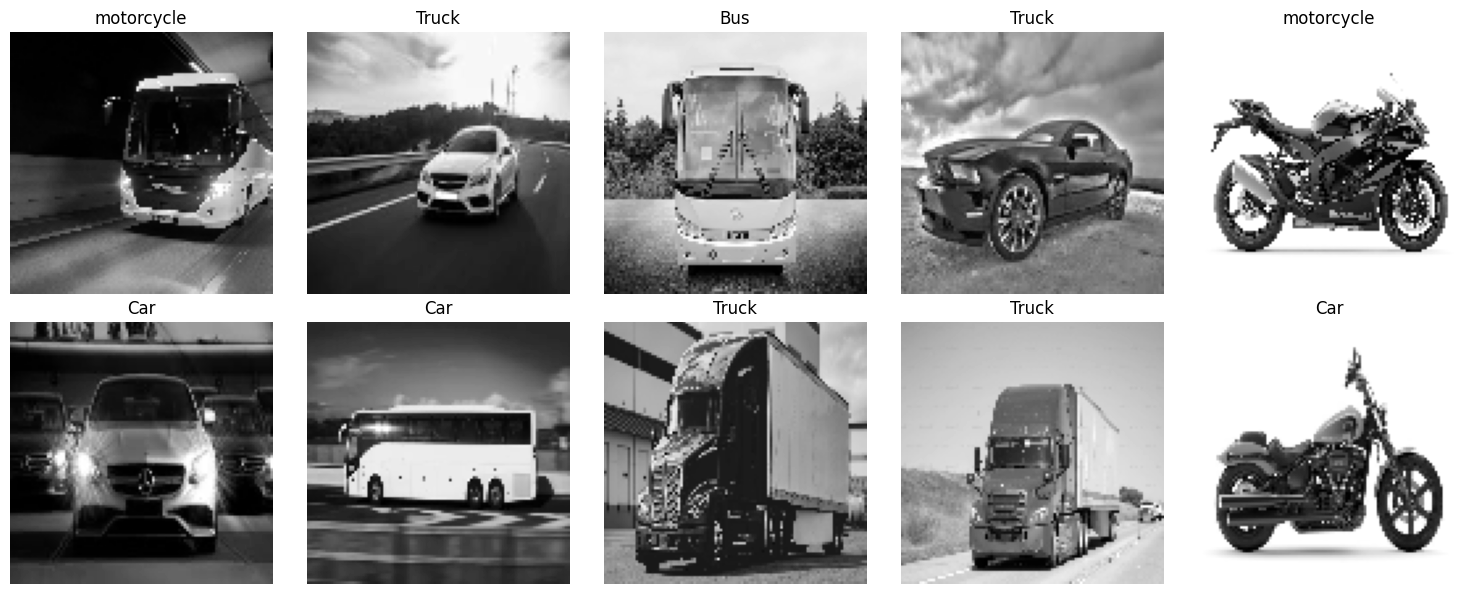

In [22]:
import random

def loadTestImages(folder):
    test_images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
        test_images.append(img.flatten())  # Flatten the image
    return np.array(test_images)

# Load test images
test_folder = '/content/drive/My Drive/dataset/test'  # Adjust this path to your test dataset folder
test_images = loadTestImages(test_folder)

# Predict on the test images
predictions = model.predict(test_images)

# Randomly select 10 predictions and their corresponding images
random_indices = random.sample(range(len(test_images)), 10)

# Display the images and their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

for i, idx in enumerate(random_indices):
    image = test_images[idx].reshape(100, 100)  # Reshape the image for display
    predicted_type = predictions[idx]  # Get the predicted type

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(predicted_type)  # Set the title to the predicted type
    axes[i].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

# CHECKER FOR BEST SVM KERNEL NOT MODIFIED

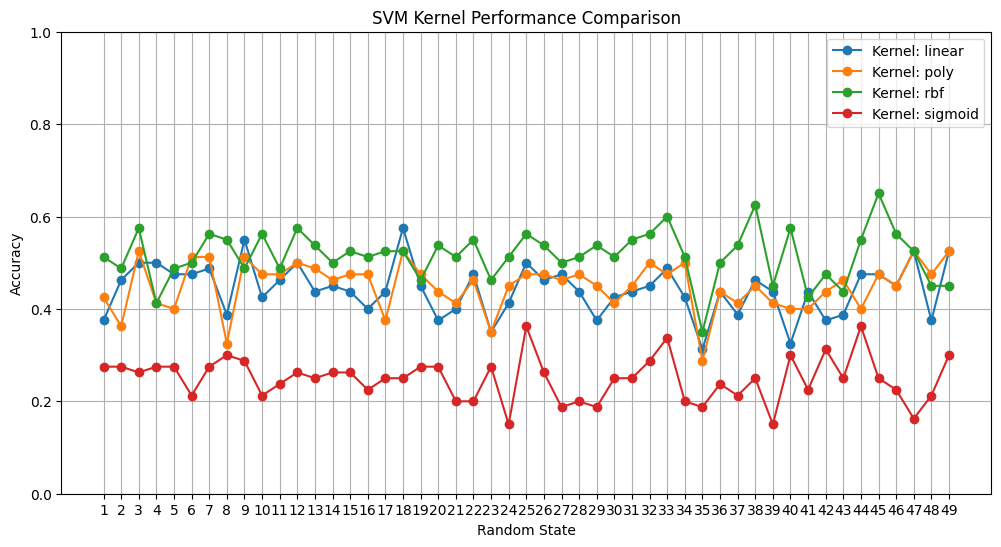

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming images and vTypes are already defined
# Store the accuracy results for different random states and kernels
random_states = range(1, 50)  # Adjust range as needed
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernels
accuracy_results = {kernel: [] for kernel in kernels}  # Initialize dictionary to store accuracy results

for kernel in kernels:
    for random_state in random_states:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=random_state)

        # Initialize the SVM model with the chosen kernel
        model = svm.SVC(kernel=kernel, C=1.0, class_weight='balanced')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Get the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[kernel].append(accuracy)

# Plot the accuracy results
plt.figure(figsize=(12, 6))
for kernel, accuracies in accuracy_results.items():
    plt.plot(random_states, accuracies, marker='o', label=f'Kernel: {kernel}')

plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.xticks(random_states)  # Set x-ticks to random states
plt.ylim(0, 1)  # Set y-axis limits
plt.grid()
plt.legend()
plt.show()

# SVM KERNEL POLY MODIFIED (ACCURATE 79%)

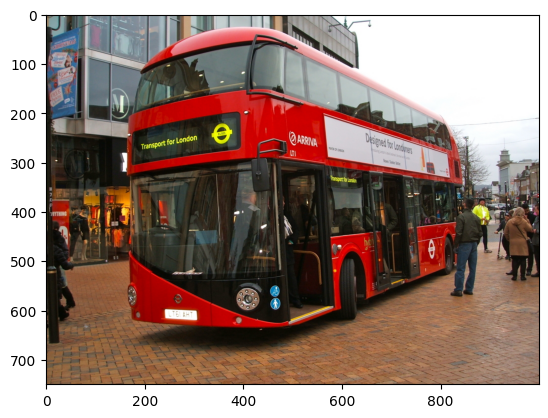

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

def dispImgModPoly(img_path):
    image = Image.open(img_path)

    plt.imshow(image)
    plt.axis('on')
    plt.show()

dispImgModPoly('/content/drive/My Drive/dataset/train/Bus/Image_5.jpg')

In [25]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Function to load images from a folder
def load_from_folder_ModPoly(folder):
    images = []
    vTypes = []
    for label, vehicle in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

            # Extract HOG features
            features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
            images.append(features)  # Append HOG features
            vTypes.append(type)

    return np.array(images), np.array(vTypes)

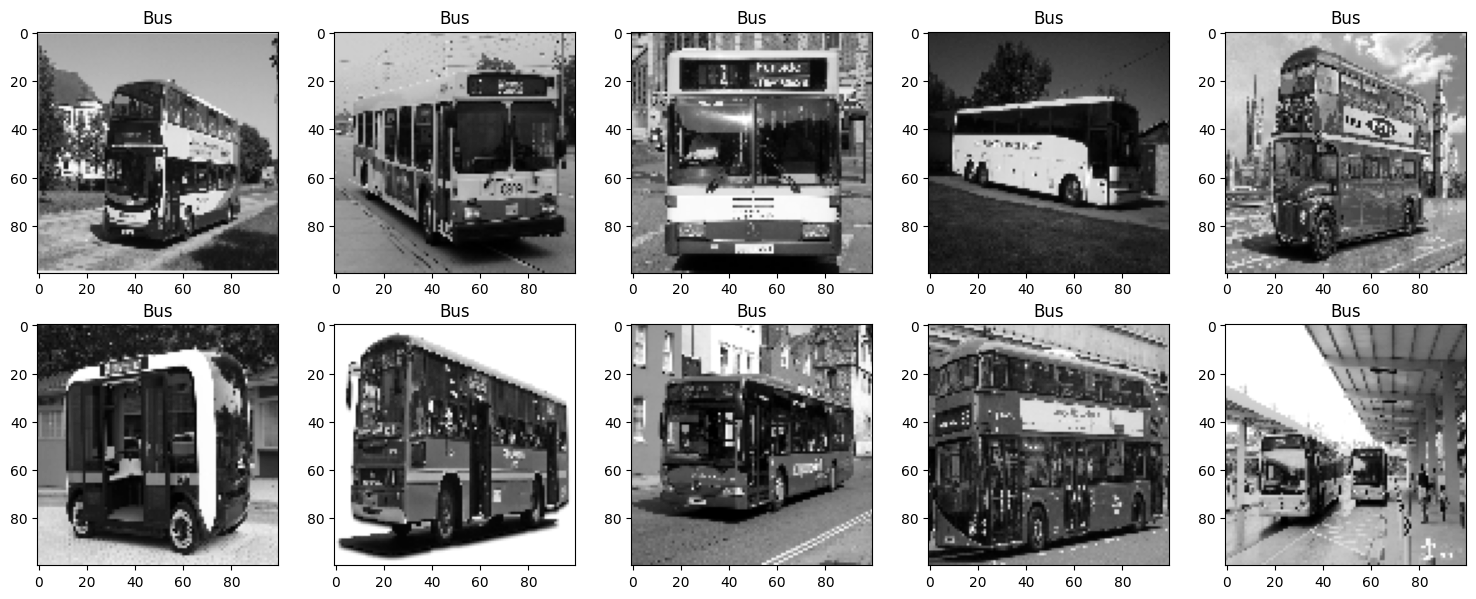

In [26]:
vehicles = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(vehicles):
    image = images[i].reshape(100,100)  # Access the i-th image
    vType = vTypes[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(vType)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Load images and vehicle types from the dataset
images, vTypes = load_from_folder_ModPoly('/content/drive/My Drive/dataset/train/')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=9)

# Initialize a polynomial SVM model
poly_model = svm.SVC(kernel='poly', C=1.0, degree=3, class_weight='balanced')
poly_model.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred_poly))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_poly)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

         Bus       0.95      0.64      0.77        28
         Car       0.81      0.94      0.87        18
       Truck       0.60      0.79      0.68        19
  motorcycle       0.87      0.87      0.87        15

    accuracy                           0.79        80
   macro avg       0.81      0.81      0.80        80
weighted avg       0.82      0.79      0.79        80

Accuracy: 78.75%


### PREDICT SINGLE IMAGE

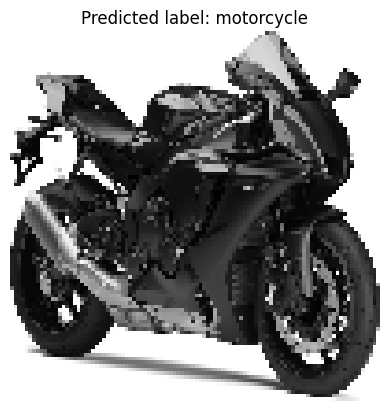

array(['motorcycle'], dtype='<U10')

In [29]:
# Function to predict an image using the trained polynomial SVM model
def predict_imagePoly(img_path, model):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

    # Extract HOG features
    features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)

    # Reshape features for prediction
    features = features.reshape(1, -1)  # Ensure shape is (1, 900)

    # Make the prediction
    prediction = model.predict(features)

    # Display the image and prediction
    plt.imshow(img, cmap='gray')  # Show the original grayscale image
    plt.title(f'Predicted label: {prediction[0]}')  # Show the prediction as title
    plt.axis('off')  # Hide axes
    plt.show()

    return prediction

# Example usage to predict an image
img_path = '/content/drive/My Drive/dataset/test/motorcycle2.jpg'  # Replace with your image path
predict_imagePoly(img_path, poly_model)


### PREDICT RANDOM 10 IMAGES

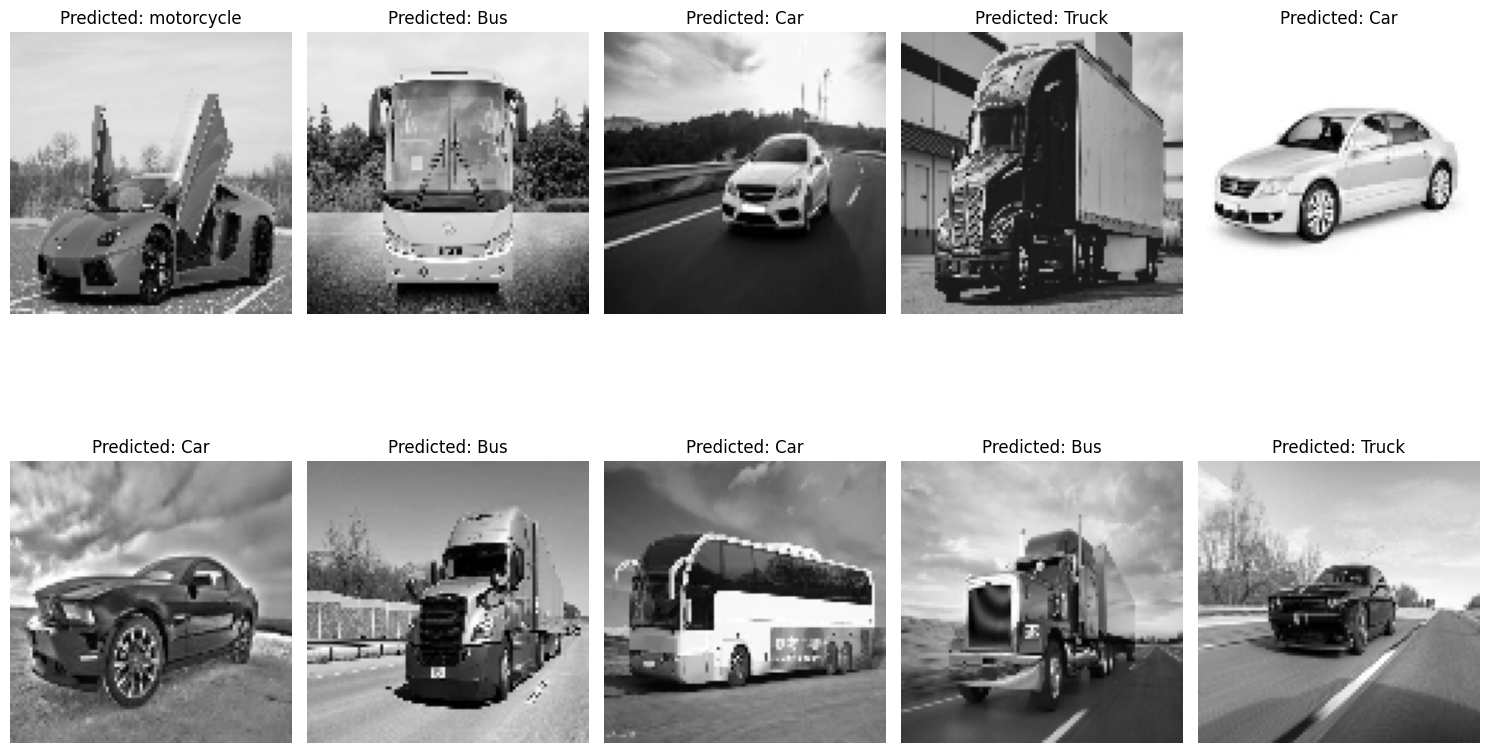

In [30]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.feature import hog

# Function to load test images from a folder
def load_test_imagesPoly(test_folder):
    image_paths = []
    for filename in os.listdir(test_folder):
        img_path = os.path.join(test_folder, filename)
        # Check if it's a file and not a directory
        if os.path.isfile(img_path):
            image_paths.append(img_path)
    return image_paths

# Function to predict an image using the trained polynomial SVM model
def predict_imagePoly(img_path, model):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

    # Extract HOG features
    features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)

    # Reshape features for prediction
    features = features.reshape(1, -1)  # Ensure shape is (1, 900)

    # Make the prediction
    prediction = model.predict(features)

    return prediction[0], img  # Return predicted label and the image

# Path to your test images folder
test_folder = r'/content/drive/My Drive/dataset/test/'  # Use raw string notation for paths

# Load test images
test_image_paths = load_test_imagesPoly(test_folder)

# Check if there are any images loaded
if len(test_image_paths) == 0:
    print("No images found in the specified test folder.")
else:
    # Randomly select 10 images from the test folder
    random_test_images = random.sample(test_image_paths, min(10, len(test_image_paths)))  # Handle cases with fewer than 10 images

    # Prepare to plot the images and predictions
    plt.figure(figsize=(15, 10))  # Set the figure size
    for i, img_path in enumerate(random_test_images):
        predicted_label, img = predict_imagePoly(img_path, poly_model)  # Using the polynomial model

        # Plot each image in a subplot
        plt.subplot(2, 5, i + 1)  # Change 3, 4 to the number of rows and columns you prefer
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')  # Hide axes

    plt.tight_layout()  # Adjust subplots to fit in the figure area.
    plt.show()


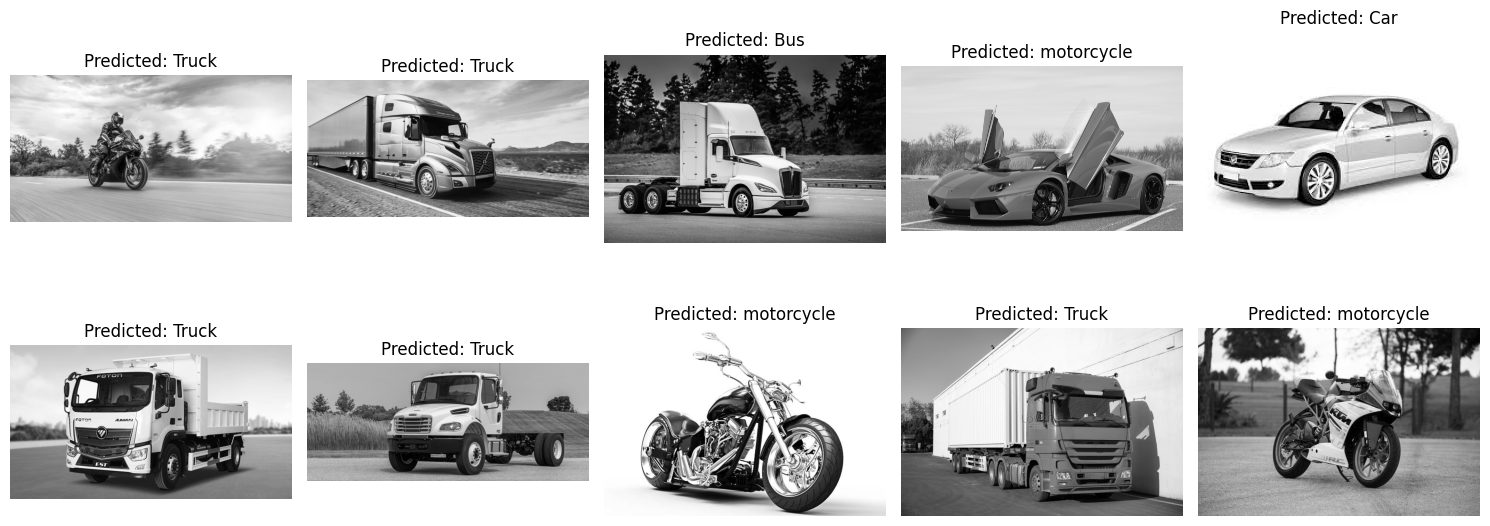

In [31]:
import random

# Function to load test images and extract HOG features
def load_test_images(folder):
    test_images = []
    test_filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image was loaded correctly
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

            # Extract HOG features
            features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
            test_images.append(features)  # Append HOG features
            test_filenames.append(filename)  # Keep track of the original filename

    return np.array(test_images), test_filenames

# Load test images and their features
test_folder = '/content/drive/My Drive/dataset/test/'  # Update this to your test dataset folder
test_images, test_filenames = load_test_images(test_folder)

# Make predictions on the test set
test_predictions = poly_model.predict(test_images)

# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(test_images)), 10)

# Display the images and their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

for i, idx in enumerate(random_indices):
    img_path = os.path.join(test_folder, test_filenames[idx])  # Get the image path
    img = cv2.imread(img_path)  # Load the original image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    axes[i].imshow(img, cmap='gray')  # Show the grayscale image
    axes[i].set_title(f'Predicted: {test_predictions[idx]}')  # Set the title to the predicted type
    axes[i].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


# CHECK BEST SVM KERNEL MODIFIED

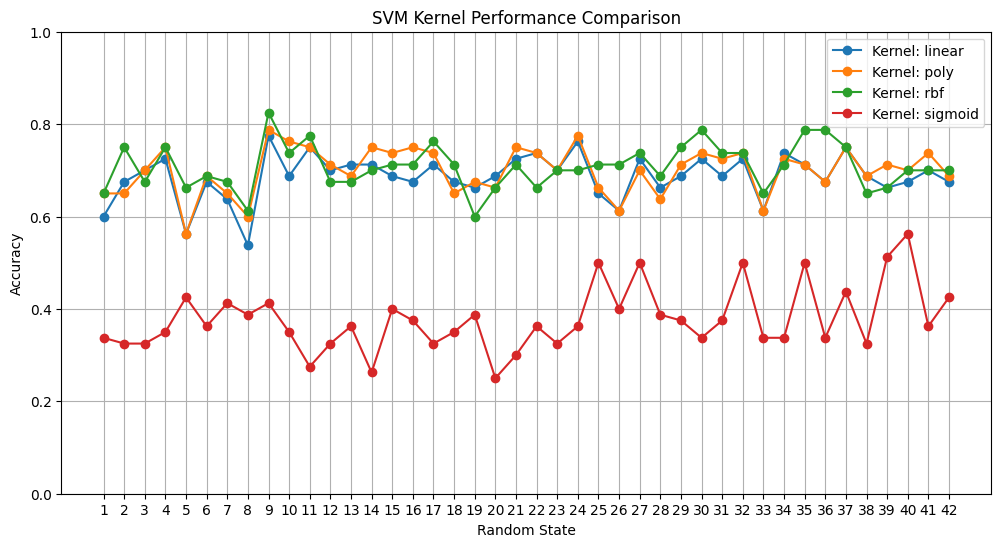

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming images and vTypes are already defined
# Store the accuracy results for different random states and kernels
random_states = range(1, 43)  # Adjust range as needed
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernels
accuracy_results = {kernel: [] for kernel in kernels}  # Initialize dictionary to store accuracy results

for kernel in kernels:
    for random_state in random_states:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=random_state)

        # Initialize the SVM model with the chosen kernel
        model = svm.SVC(kernel=kernel, C=1.0, class_weight='balanced')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Get the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[kernel].append(accuracy)

# Plot the accuracy results
plt.figure(figsize=(12, 6))
for kernel, accuracies in accuracy_results.items():
    plt.plot(random_states, accuracies, marker='o', label=f'Kernel: {kernel}')

plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.xticks(random_states)  # Set x-ticks to random states
plt.ylim(0, 1)  # Set y-axis limits
plt.grid()
plt.legend()
plt.show()

# SVM KERNEL RBF MODIFIED (ACCURATE 82%)

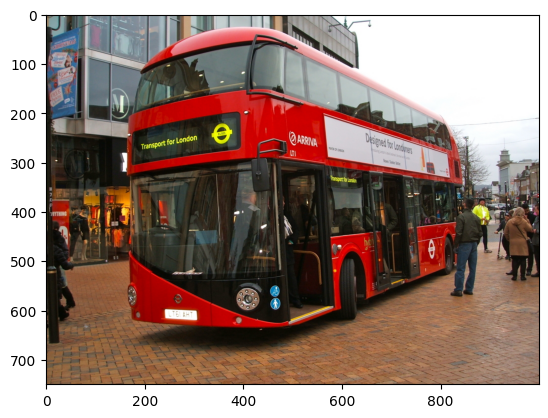

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

def dispImgModRBF(img_path):
    image = Image.open(img_path)

    plt.imshow(image)
    plt.axis('on')
    plt.show()

dispImgModRBF('/content/drive/My Drive/dataset/train/Bus/Image_5.jpg')

In [34]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Function to load images from a folder
def load_from_folder_ModRBF(folder):
    images = []
    vTypes = []
    for label, vehicle in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

            # Extract HOG features
            features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
            images.append(features)  # Append HOG features
            vTypes.append(type)

    return np.array(images), np.array(vTypes)

In [35]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Load images and vehicle types from the dataset
images, vTypes = load_from_folder_ModRBF('/content/drive/My Drive/dataset/train/')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, vTypes, test_size=0.2, random_state=42)

# Initialize an SVM model with RBF kernel
rbf_model = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced')
rbf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = rbf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_rbf)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print(classification_report(y_test, y_pred_rbf))

Accuracy: 70.00%
              precision    recall  f1-score   support

         Bus       0.85      0.65      0.74        26
         Car       0.75      0.67      0.71        18
       Truck       0.43      0.56      0.49        18
  motorcycle       0.81      0.94      0.87        18

    accuracy                           0.70        80
   macro avg       0.71      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80



### PREDICT SINGLE IMAGE ONLY

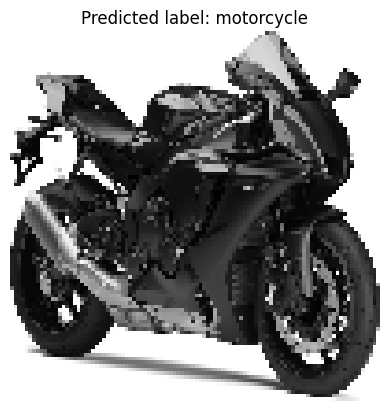

array(['motorcycle'], dtype='<U10')

In [38]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

# Function to predict an image using the trained RBF SVM model
def predict_imageRBF(img_path, model):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

    # Extract HOG features
    features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)

    # Reshape features for prediction
    features = features.reshape(1, -1)  # Ensure shape is (1, 900)

    # Make the prediction
    prediction = model.predict(features)

    # Display the image and prediction
    plt.imshow(img, cmap='gray')  # Show the original grayscale image
    plt.title(f'Predicted label: {prediction[0]}')  # Show the prediction as title
    plt.axis('off')  # Hide axes
    plt.show()

    return prediction

# Example usage to predict an image
img_path = '/content/drive/My Drive/dataset/test/motorcycle2.jpg'  # Replace with your image path
predict_imageRBF(img_path, rbf_model)  # Assuming rbf_model is your trained RBF SVM

### PREDICT 10 RANDOM IMAGES

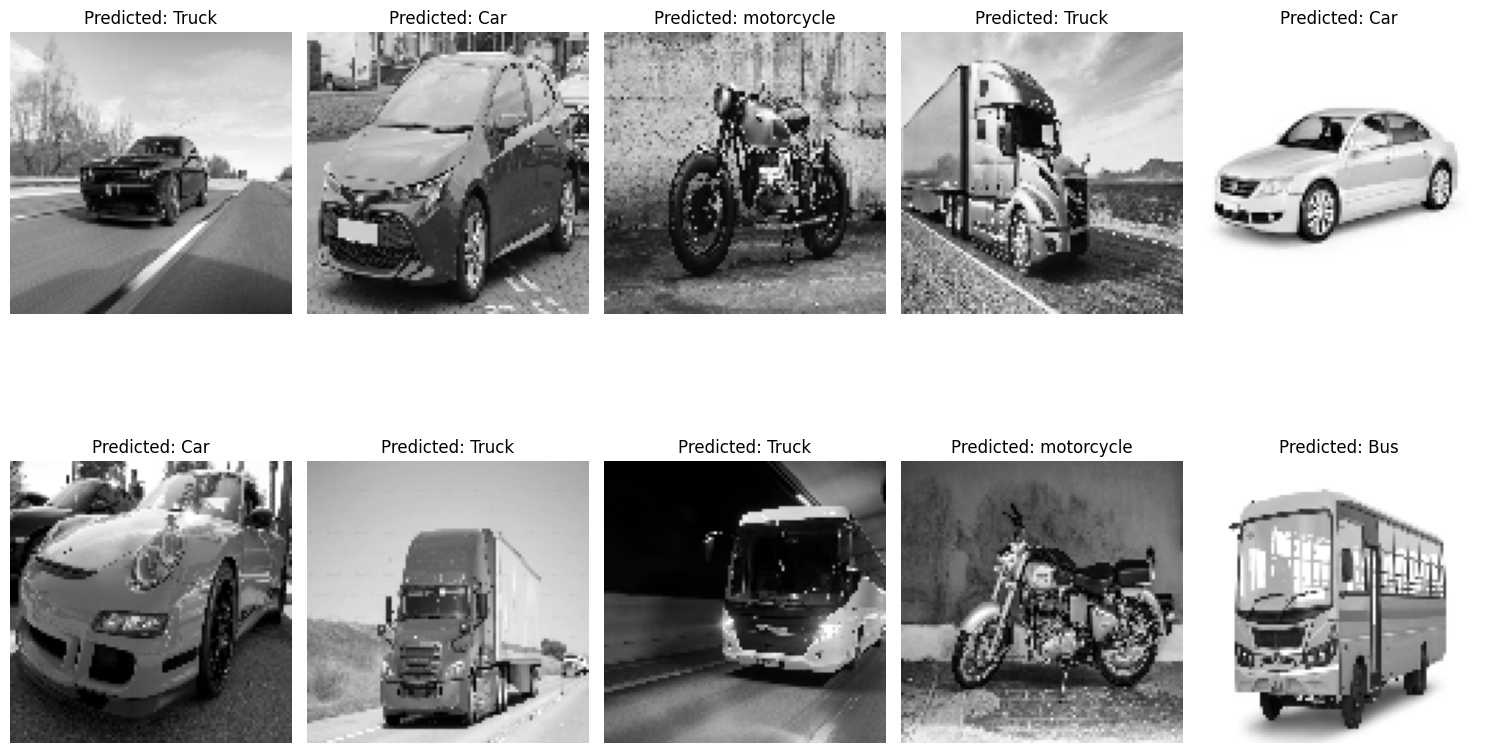

In [36]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm

# Function to load test images from a folder
def load_test_imagesRBF(test_folder):
    image_paths = []
    for filename in os.listdir(test_folder):
        img_path = os.path.join(test_folder, filename)
        # Check if it's a file and not a directory
        if os.path.isfile(img_path):
            image_paths.append(img_path)
    return image_paths

# Function to predict an image using the trained RBF SVM model
def predict_imageRBF(img_path, model):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels

    # Extract HOG features
    features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)

    # Reshape features for prediction
    features = features.reshape(1, -1)  # Ensure shape is (1, 900)

    # Make the prediction
    prediction = model.predict(features)

    return prediction[0], img  # Return predicted label and the image

# Path to your test images folder
test_folder = '/content/drive/My Drive/dataset/test/'  # Use raw string notation for paths

# Load test images
test_image_paths = load_test_imagesRBF(test_folder)

# Check if there are any images loaded
if len(test_image_paths) == 0:
    print("No images found in the specified test folder.")
else:
    # Randomly select 10 images from the test folder
    random_test_images = random.sample(test_image_paths, min(10, len(test_image_paths)))  # Handle cases with fewer than 10 images

    # Prepare to plot the images and predictions
    plt.figure(figsize=(15, 10))  # Set the figure size
    for i, img_path in enumerate(random_test_images):
        predicted_label, img = predict_imageRBF(img_path, rbf_model)  # Using the RBF model

        # Plot each image in a subplot
        plt.subplot(2, 5, i + 1)  # Change 2, 5 to the number of rows and columns you prefer
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')  # Hide axes

    plt.tight_layout()  # Adjust subplots to fit in the figure area.
    plt.show()
